In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from tqdm import trange
plt.style.use(['science','grid'])
from ast import literal_eval
import json
import matplotlib as mpl


# import custom modules
import Pub
import PubCrawlFunctions as PCF
import Ant
import Logger

# import randomPubsInit

In [11]:
# velocity of an ant
velAnt = int(5000 / 60)         # 5km/h in m/min

# load the pubs
Pubs = PCF.initPubs('pubs.csv')

# set all pub popularities to 1
for pub in Pubs:
    pub.popularity *= 30

In [12]:
# load the best data

Ants_ClosingTime = Logger.loadLog('Logs/BestPath_ClosingTime.json', velAnt)
bestAnt_ClosingTime = Ants_ClosingTime[-1]

Ants_GivenPath = Logger.loadLog('Logs/BestPath_GivenPath.json', velAnt)
bestAnt_GivenPath = Ants_GivenPath[-1]

Ants_Queue = Logger.loadLog('Logs/BestPath_Queue.json', velAnt)
bestAnt_Queue = Ants_Queue[-1]

Ants_WaitingTime = Logger.loadLog('Logs/BestPath_WaitingTime.json', velAnt)
bestAnt_WaitingTime = Ants_WaitingTime[-1]


In [13]:
# sum all popularities
sumPopularity = 0
for p in Pubs:
    sumPopularity += p.popularity

print('Sum of all popularities: ', sumPopularity)

Sum of all popularities:  40350


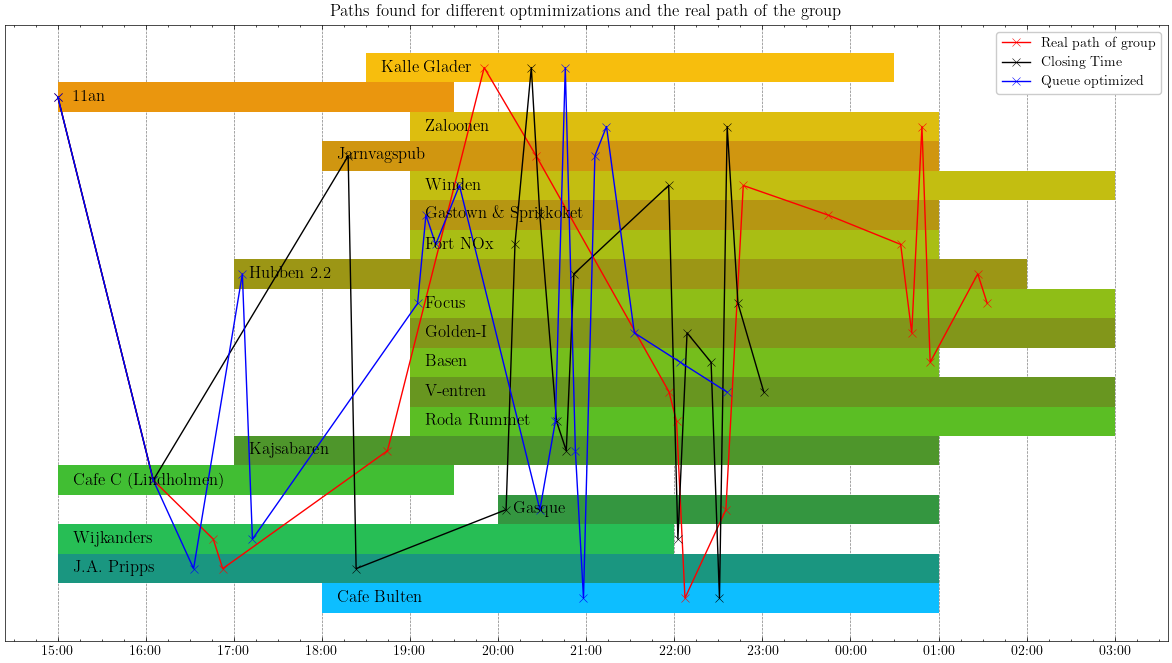

In [14]:
# create a plot where the opening hours and closing hours of the pubs are shown
# in vertical direction plot all the pubs
# in horizontal direction plot the time

# time is in minutes, the opening times are shown as recatangles

fig, ax = plt.subplots(figsize=(15, 8))
# bestPath = np.array(bestAnt.timedPath)

# load the x y coordinates of the best path
BestPath_ClosingTime = np.array(bestAnt_ClosingTime.timedPath)
BestPath_GivenPath = np.array(bestAnt_GivenPath.timedPath)
BestPath_Queue = np.array(bestAnt_Queue.timedPath)
BestPath_WaitingTime = np.array(bestAnt_WaitingTime.timedPath)

X_ClosingTime = BestPath_ClosingTime[:,1]
Y_ClosingTime = BestPath_ClosingTime[:,0] + .5

X_GivenPath = BestPath_GivenPath[:,1]
Y_GivenPath = BestPath_GivenPath[:,0] + .5

X_Queue = BestPath_Queue[:,1]
Y_Queue = BestPath_Queue[:,0] + .5

X_WaitingTime = BestPath_WaitingTime[:,1]
Y_WaitingTime = BestPath_WaitingTime[:,0] + .5


i = 0

for p in Pubs:
    i += 1
    r = 13
    b = 255
    g = 40 * (i % 2) + 150

    # use different color for each pub
    # plot the opening times
    ax.broken_barh([(p.openingTime, p.closingTime - p.openingTime)], (p.pubID, 1), facecolors=[i*r/255,g/255,b/i/255])
    ax.text(p.openingTime +10, p.pubID + .5, p.pubName, fontsize=12, fontstyle='oblique', verticalalignment='center', horizontalalignment='left', color='black')

ax.plot(X_GivenPath, Y_GivenPath, marker='x', markeredgecolor='red', markeredgewidth=.4, linestyle='-', color='red', linewidth=1, label='Real path of group')
ax.plot(X_ClosingTime, Y_ClosingTime, marker='x', markeredgecolor='black', markeredgewidth=0.4, linestyle='-', color='black', linewidth=1, label='Closing Time')
ax.plot(X_Queue, Y_Queue, marker='x', markeredgecolor='blue', markeredgewidth=.4, linestyle='-', color='blue', linewidth=1, label='Queue optimized')
# ax.plot(X_WaitingTime, Y_WaitingTime, marker='x', markeredgecolor='black', markeredgewidth=0.1, linestyle='-', color='purple', linewidth=1, label='Waiting Time')


# change xticks such that 0 equals 15:00, 60 equals 16:00 etc. do it until 780 equal 03:00
plt.xticks(np.arange(0, 780, 60), ('15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00','22:00','23:00','00:00','01:00','02:00','03:00'))


plt.yticks([])
plt.title('Paths found for different optmimizations and the real path of the group')
plt.grid('on')
plt.legend(loc='upper right')

# save the figure
plt.savefig('Queue_BestPath.svg', format='svg')
plt.show()
